In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
path = "D:\Download\Data Science\Decision Tree\Decision Tree\heart_disease.xlsx"

sheet_name = "Heart_disease"

data = pd.read_excel(path, sheet_name)

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [4]:
data.shape

(908, 13)

In [5]:
df = data.copy()

In [6]:
df.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [7]:
#df['sex'] = df['sex'].astype(str).str.lower().str.strip().map({'male' : 1, 'female': 0})

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [9]:
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].median())

In [10]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

summary = {}

for col in num_cols:
    mean = df[col].mean()
    median = df[col].median()
    std = df[col].std()
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower, upper)

    summary [col] = {
        'Mean' : round(mean, 2),
        'Median' : round(median, 2),
        'std': round(std, 2),
        'lower': round(lower),
        'upper': round(upper),
    }
summary_df = pd.DataFrame(summary).T
print(summary_df)

            Mean  Median     std  lower  upper
age        53.79    54.0    9.16   29.0   78.0
trestbps  133.43   130.0   20.40   84.0  180.0
chol      201.48   224.0  112.10   37.0  410.0
thalch    135.96   138.0   26.80   61.0  213.0
oldpeak     0.86     0.5    1.06   -2.0    4.0
num         1.01     1.0    1.14   -3.0    5.0


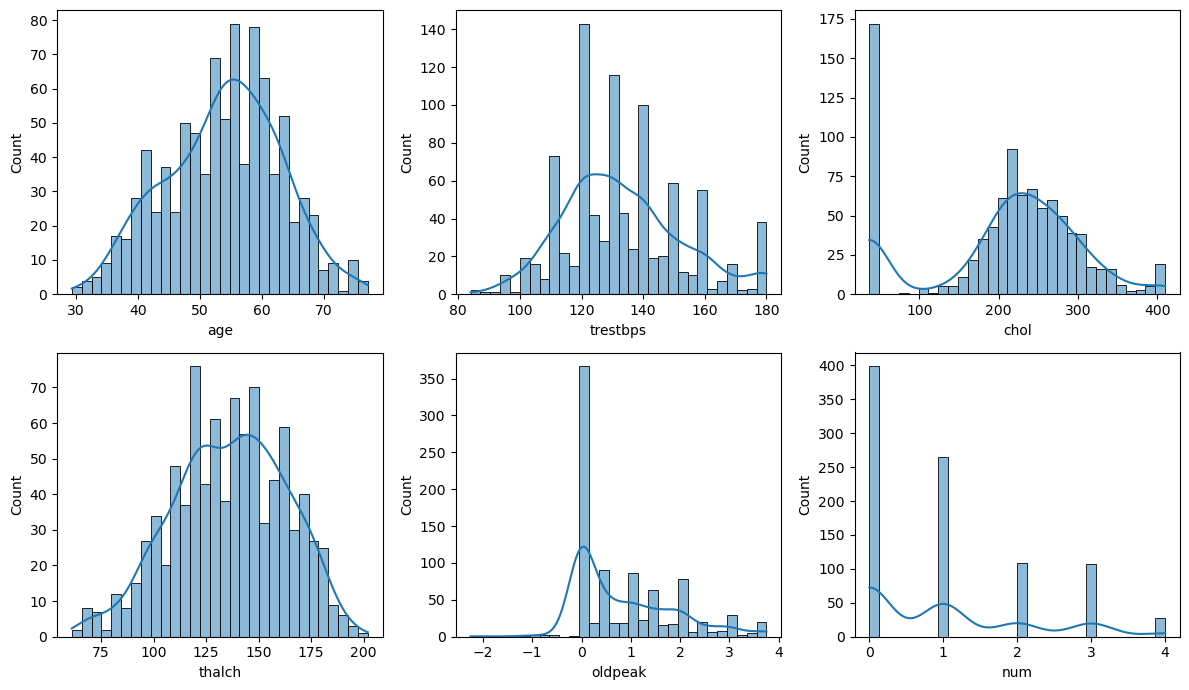

In [11]:
num_cols = df.select_dtypes(include = ['int64','float64']).columns

num_cols = num_cols[:6]

plt.figure(figsize =(12,7))

for i, col in enumerate(num_cols,1):
    plt.subplot(2,3, i)
    sns.histplot(df[col], kde = True, bins= 30)
    plt.xlabel(col)
plt.tight_layout()
plt.show()

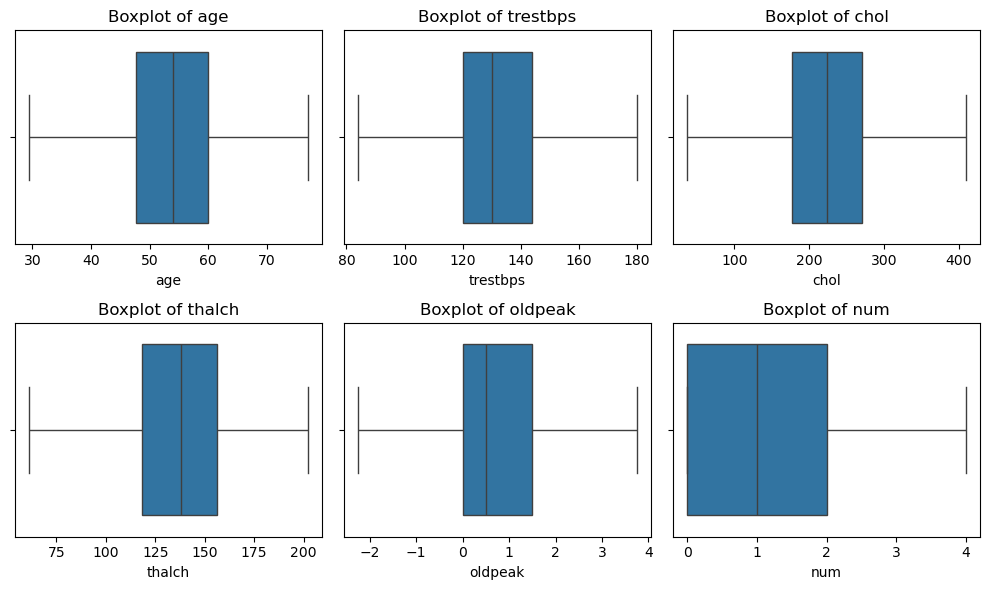

In [12]:
num_cols = num_cols[:6]
plt.figure(figsize =(10,6))

for i, col in enumerate(num_cols,1):
    plt.subplot(2,3,i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

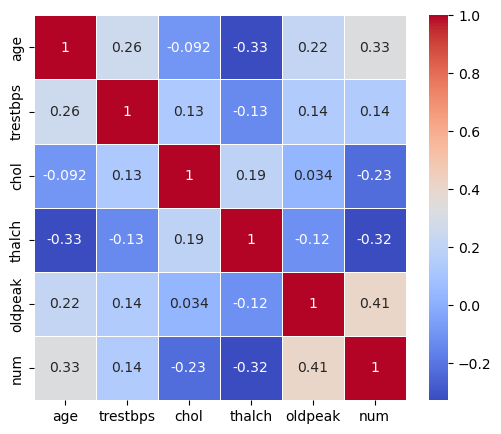

In [13]:
corr_matrix = df[num_cols].corr()
corr_matrix

plt.figure(figsize = (6,5))
sns.heatmap(corr_matrix, annot = True, cmap ='coolwarm', linewidth = 0.5)
plt.show()

In [14]:
#df['sex'] = df['sex'].astype(str).str.lower().str.strip().map({'male' : 1, 'female': 0})

In [15]:
df['exang'] = df['exang'].astype(str).str.strip().str.lower()
df['exang'] = df['exang'].replace({'ture':'true'})
df['exang'] = df['exang'].map({'true' : 1, 'false': 0})

In [16]:
df['exang'].unique()

array([0, 1])

In [17]:
df['fbs'] = df['fbs'].astype(str).str.strip().str.lower()
df['fbs'] = df['fbs'].map({'true' : 1, 'false': 0})

In [18]:
df['fbs'].unique()

array([1, 0])

In [19]:
cat_cols = ['cp', 'restecg', 'slope', 'thal']

for col in cat_cols:
    s = df[col].astype(str).str.strip().str.lower()
    if set(s.unique()).issubset(bool_map.keys()):
        df[col] = s.map(bool_map)

In [20]:
dummies = pd.get_dummies(df[cat_cols], prefix = cat_cols, dtype = int)

In [21]:
df_ohe = pd.concat([df,dummies], axis = 1)
df_ohe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,...,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
0,63.0,Male,typical angina,145,233.0,1,lv hypertrophy,150,0,2.3,...,1,1,0,0,1,0,0,1,0,0
1,41.0,Male,atypical angina,135,203.0,0,normal,132,0,0.0,...,0,0,1,0,0,1,0,1,0,0
2,57.0,Male,asymptomatic,140,192.0,0,normal,148,0,0.4,...,0,0,1,0,0,1,0,1,0,0
3,52.0,Male,typical angina,118,186.0,0,lv hypertrophy,190,0,0.0,...,1,1,0,0,0,1,0,1,0,0
4,57.0,Male,asymptomatic,110,201.0,0,normal,126,1,1.5,...,0,0,1,0,0,1,0,1,0,0


In [22]:
df_ohe.drop(columns=cat_cols, inplace=True)

In [23]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       908 non-null    float64
 1   sex                       908 non-null    object 
 2   trestbps                  908 non-null    int64  
 3   chol                      908 non-null    float64
 4   fbs                       908 non-null    int64  
 5   thalch                    908 non-null    int64  
 6   exang                     908 non-null    int64  
 7   oldpeak                   908 non-null    float64
 8   num                       908 non-null    int64  
 9   cp_asymptomatic           908 non-null    int64  
 10  cp_atypical angina        908 non-null    int64  
 11  cp_non-anginal            908 non-null    int64  
 12  cp_typical angina         908 non-null    int64  
 13  restecg_lv hypertrophy    908 non-null    int64  
 14  restecg_no

In [24]:
df_ohe['sex'] = df_ohe['sex'].astype(str).str.lower().str.strip().map({'male' : 1, 'female': 0})

In [25]:
df_ohe['sex'].unique()

array([1, 0])

In [26]:
X = df_ohe.drop(columns = ['num'])
y = df_ohe['num']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [28]:
X_train.head()

,age,sex,trestbps,chol,fbs,thalch,exang,oldpeak,cp_asymptomatic,cp_atypical angina,...,cp_typical angina,restecg_lv hypertrophy,restecg_normal,restecg_st-t abnormality,slope_downsloping,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect
84,42.0,1,120,295.000,0,162,0,0.0,0,1,...,0,0,1,0,0,0,1,0,1,0
10,30.0,0,170,237.000,0,170,0,0.0,0,0,...,1,0,0,1,1,0,0,1,0,0
617,74.0,1,140,237.000,1,94,0,0.0,0,0,...,0,0,1,0,0,0,1,0,0,1
250,41.0,1,104,36.875,0,111,0,0.0,1,0,...,0,0,0,1,0,1,0,0,1,0
869,49.0,1,137,142.000,0,68,0,0.5,0,0,...,0,0,1,0,0,1,0,0,1,0


In [29]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree
dt = DecisionTreeClassifier(random_state = 42, class_weight = 'balanced', criterion = 'entropy', max_depth=3)
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=3, random_state=42)

In [30]:
pred = dt.predict(X_test)
pd.Series(pred).value_counts()

0    79
3    48
1    43
4     7
2     5
Name: count, dtype: int64

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.71      0.75        89
           1       0.44      0.40      0.42        48
           2       0.20      0.05      0.07        22
           3       0.19      0.53      0.28        17
           4       0.00      0.00      0.00         6

    accuracy                           0.51       182
   macro avg       0.33      0.34      0.30       182
weighted avg       0.55      0.51      0.51       182



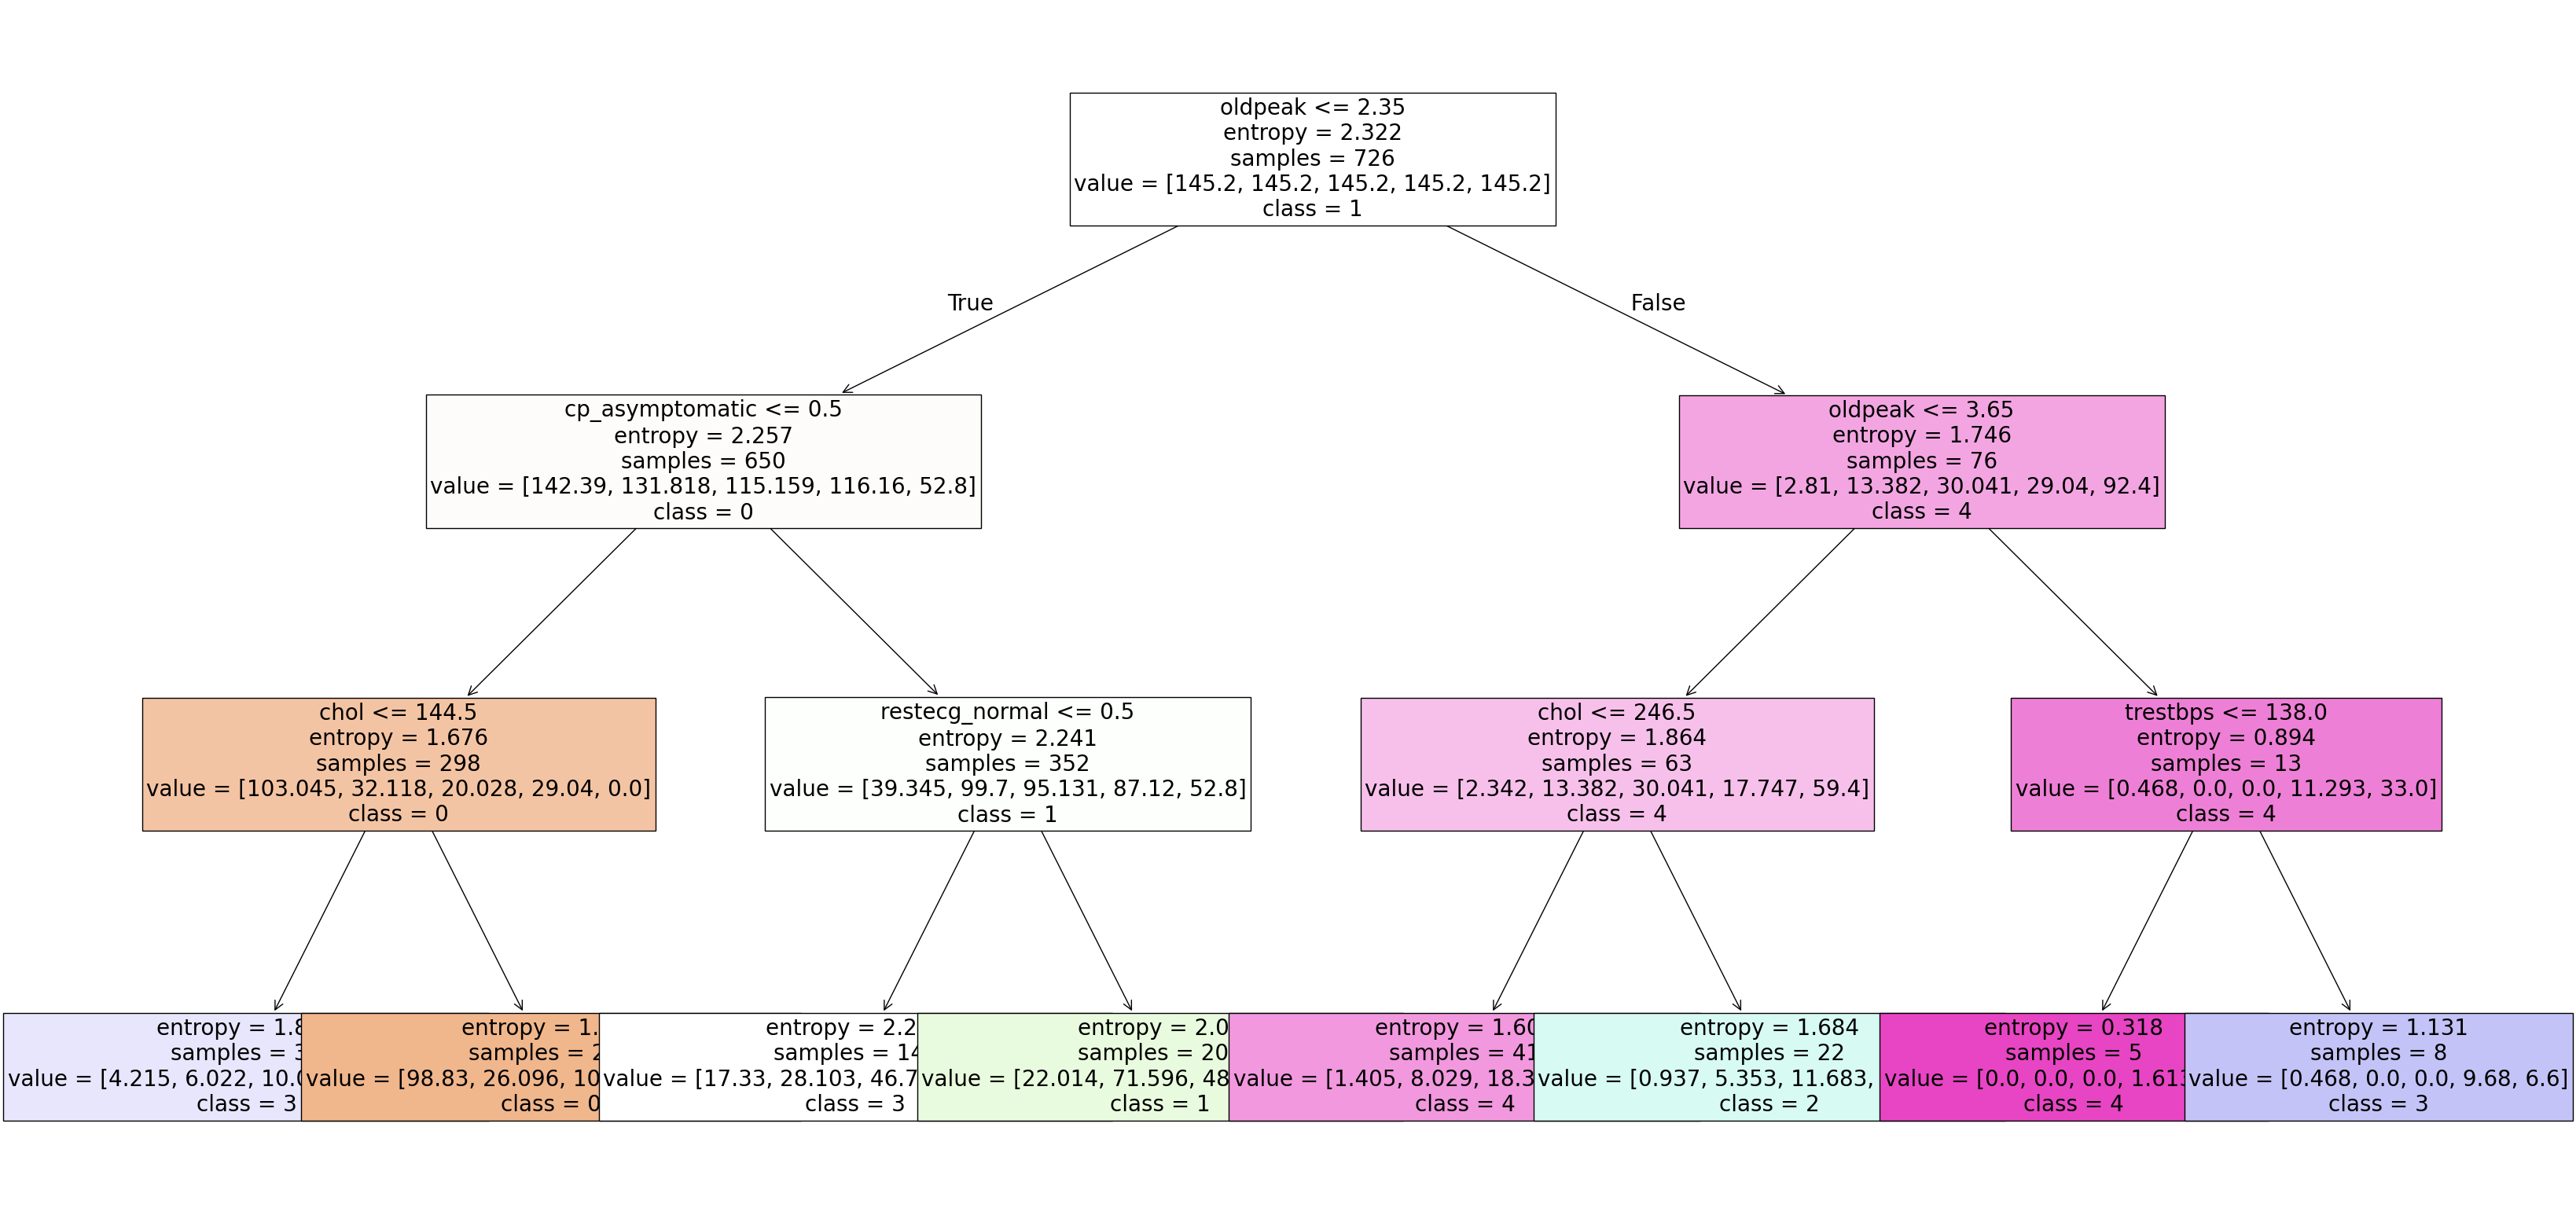

In [32]:
plt.figure(figsize = (40,20))
#tree.plot_tree(dt)
plot_tree(
    dt,
    feature_names=X_train.columns,
    class_names=[str(c) for c in sorted(y.unique())],
    filled=True,
    fontsize=20,               
    max_depth=4       
)
plt.show()

### Conclusion

## Interview Question